# Airline Passenger Satisfaction
***

![Happy passengers on a plane](./Photos/Happy-passengers.avif)

**Author:** [Emmi Galfo](mailto:emmi.galfo@gmail.com)
***

## Business Problem 
***
Airline companies strive to provide excellent customer service. Understanding which factors to focus investments on can increase customer retention, enhance customer experience, increase revenue, reduce costs, and improve brand image. I'm asked to predict which factors are most important for passenger satisfaction and provide actionable insights for airlines to improve their overall customer experience. 


## Overview 
***
This classification project looks into which factors contribute most in predicting airline customer satisfaction. By using machine learning modeling to analyze customer data, I was able to predict which factors were most important for passenger satisfaction and provide actionable insights for airlines to improve their overall customer experience. My results showed that online boarding, personal vs business travel, inflight wifi service, inflight entertainment service, and customer loyalty had the most impact on overall satisfaction. 

## Data Understanding
***

For this project, a large dataset regarding airline passenger satisfaction and travel features was downloaded from kaggle.com. 
Below are descriptions taken from the database describing each column.  

### Column names and descriptions:
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats
%matplotlib inline

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve 
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import make_scorer, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
#Load Training DataFrame
train = pd.read_csv('AirlineDataSet/train.csv', index_col=[0])
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#Load Testing DataFrame
test = pd.read_csv('AirlineDataSet/test.csv', index_col=[0])
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [4]:
print(f'Training shape: {train.shape}')
print(f'Testing shape: {test.shape}')
print('train split:', len(train)/(len(train)+len(test)))

Training shape: (103904, 24)
Testing shape: (25976, 24)
train split: 0.8


In [46]:
103904+25976

129880

The training data is 80% of the full dataset. So we are working with an 80:20 split. This is good. We can leave that alone. 

In [5]:
#Check out columns
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [6]:
#Check for null values
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

There are 310 null values in the 'Arrival Delay in Minutes' column. 

In [7]:
#Look at Numerical columns
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [8]:
#Create a heatmap to look at how the features correlate with one another
train_num = train.select_dtypes('number')
train_num

corr = train_num.corr()

# Create a mask to only show the lower triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))



<AxesSubplot:>

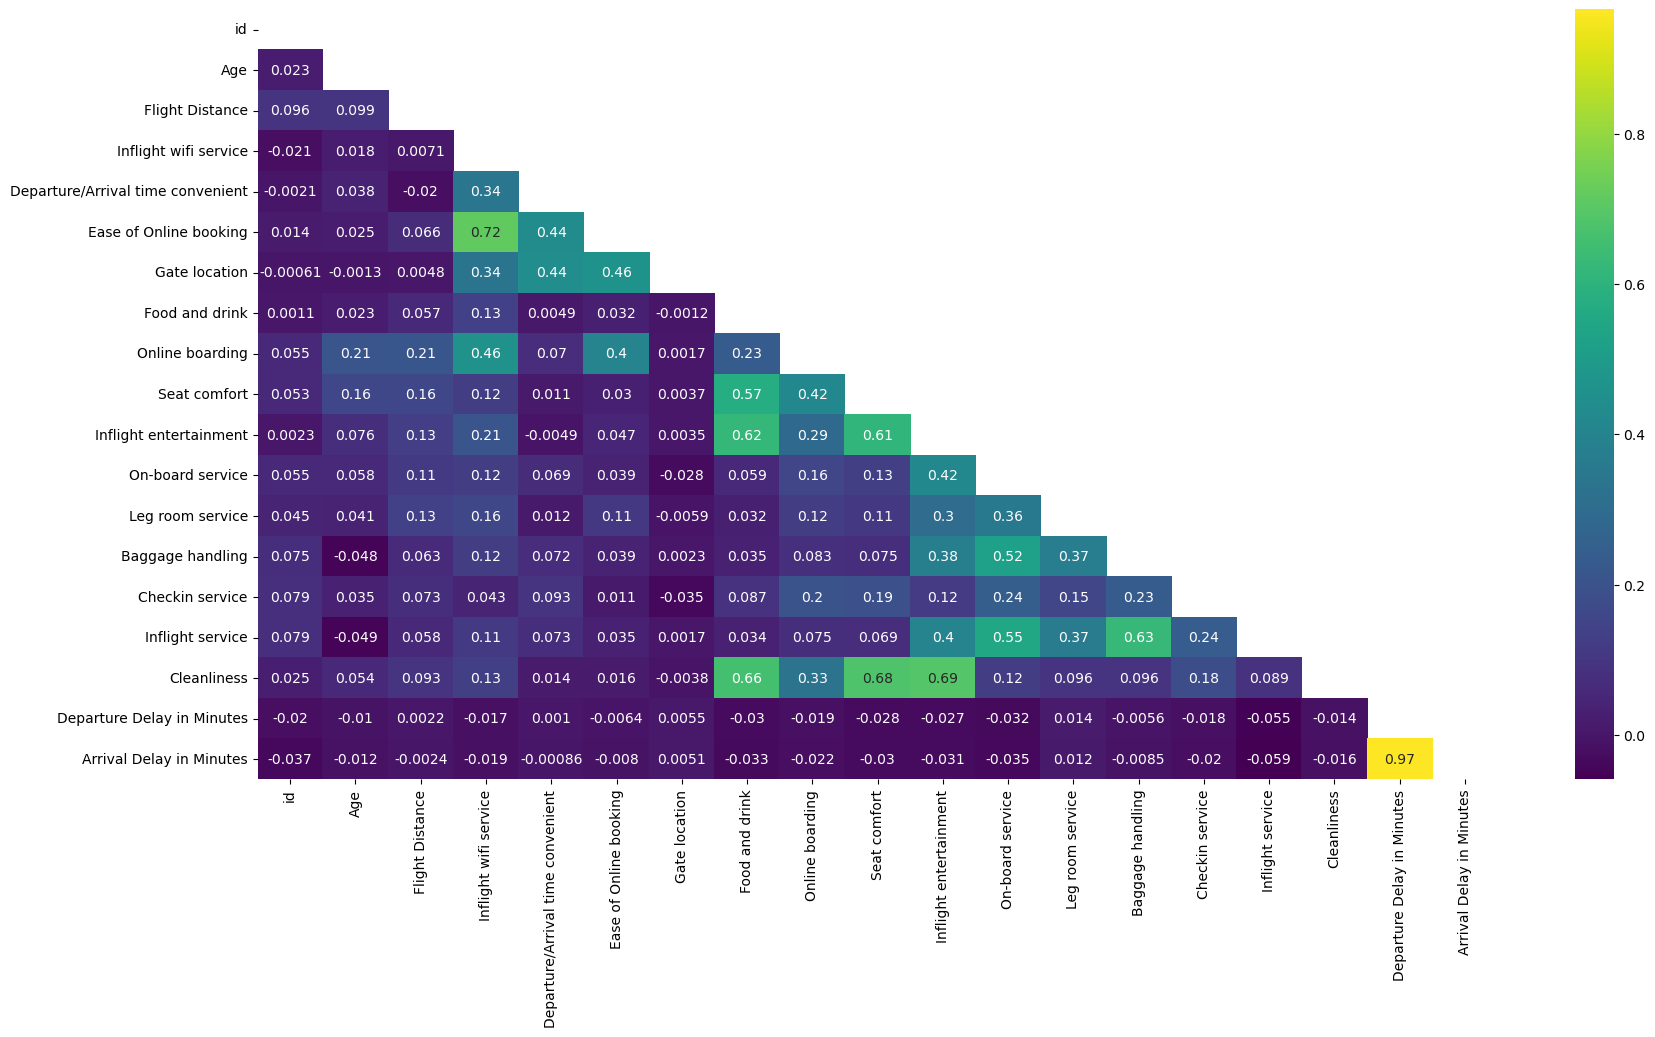

In [9]:
# Create the heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='viridis', annot=True, mask=mask)

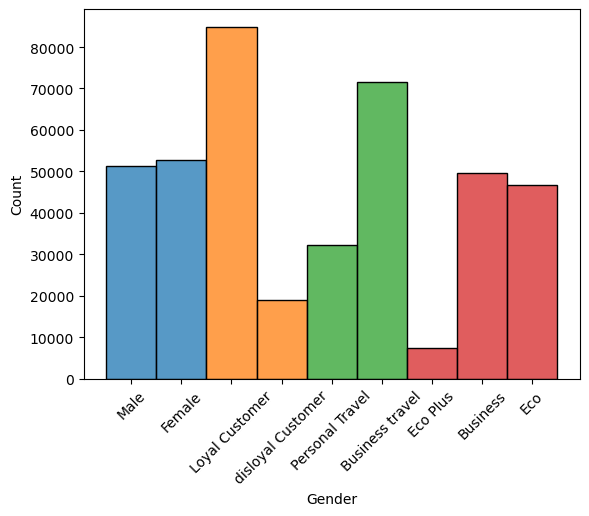

In [14]:
#Look at categorical columns
cat = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in cat:
    sns.histplot(data=train[col])
    plt.xticks(rotation=45)

<AxesSubplot:xlabel='satisfaction', ylabel='Count'>

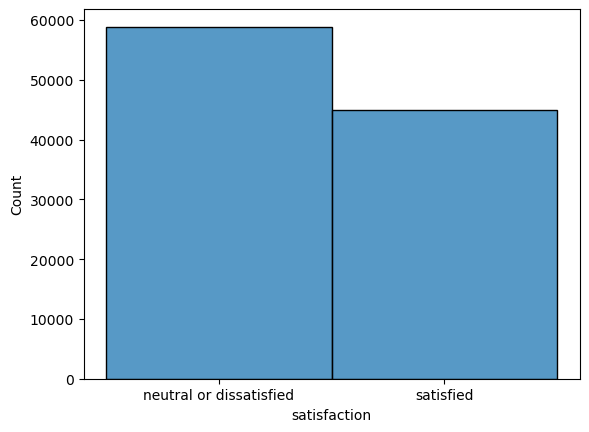

In [16]:
#look at target column
sns.histplot(data=train['satisfaction'])

## PREPROCESSING

Steps:
* Drop unneccessary rows
* Split data into target and features
* Split data into categorical and numerical data
* Numerical: 
    * Fill in Null Values Using SimpleImputer
    * Scale Data using Standard Scaler
* Catigorical:
    * One hot encode
    

In [17]:
#Drop id from both the test and training data sets.
train.drop('id', inplace=True, axis=1)
test.drop('id', inplace=True, axis=1)

In [18]:
# Split data into target and features
#Training data
X_train = train.drop('satisfaction', axis=1)
y_train = train.satisfaction

#Test data
X_test= test.drop('satisfaction', axis=1)
y_test = test.satisfaction

#### Preprocessing pipeline

In [19]:
# #split features into categorical and numerical data
X_train_cat = X_train.select_dtypes('object') #will get the cateogical columns
X_train_num = X_train.select_dtypes('number') #will get both float and int columns

# #Create a pipeline to preprocess the categorical data: 
# #use an imputer to deal with missing values
# #scale the data.
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                   ('scaler', StandardScaler())])

# #Create a pipeline to preprocess the numerical data:
# #onehot encode
cat_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))]) 

# #Column transformer
trans = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, X_train_num.columns),
    ('categorical', cat_pipeline, X_train_cat.columns)])



In [20]:
#fit transform X_train
X_train_preprocessed = trans.fit_transform(X_train)

categorical_columns = list(trans.transformers_[1][1].named_steps['ohe'].get_feature_names())
numerical_columns = list(X_train_num.columns)
column_names = numerical_columns + categorical_columns

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, 
                                    columns= column_names, index=X_train.index)

X_train_preprocessed.head()

/Users/emmi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,x0_Male,x1_disloyal Customer,x2_Personal Travel,x3_Eco,x3_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0.549799,1.156436,1.305870,0.266393,0.074169,1.0,0.0,1.0,0.0,1.0
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,1.0,1.0,0.0,0.0,0.0
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.549799,0.305848,1.305870,-0.387532,-0.391554,0.0,0.0,0.0,0.0,0.0
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,-1.821012,0.305848,-0.980251,-0.099805,-0.158692,0.0,0.0,0.0,0.0,0.0
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554,1.0,0.0,0.0,0.0,0.0


In [21]:
#Transform X_test
X_test_preprocessed = trans.transform(X_test)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=column_names, index=X_test.index)
X_test_preprocessed.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,x0_Male,x1_disloyal Customer,x2_Personal Travel,x3_Eco,x3_Eco Plus
0,0.834958,-1.032398,1.709804,0.616172,0.173776,0.800803,-0.152031,0.555482,-0.333108,1.231704,...,-1.030742,1.156436,1.305870,0.920317,0.746880,0.0,0.0,0.0,1.0,0.0
1,-0.223601,1.678348,-1.302646,-1.350954,0.173776,-1.547323,1.352264,0.555482,1.183099,0.481508,...,-0.240472,0.305848,1.305870,-0.387532,-0.391554,0.0,0.0,0.0,0.0,0.0
2,-1.282160,-1.000307,-0.549533,-2.006662,-0.541060,0.800803,-0.904178,-0.926545,-1.091211,-1.018885,...,-1.030742,-1.395328,-0.980251,-0.387532,-0.391554,1.0,1.0,0.0,1.0,0.0
3,0.305678,2.193821,-2.055758,-2.006662,-1.970731,-0.764614,-0.152031,0.555482,0.424996,-1.769081,...,-0.240472,-2.245916,0.543829,-0.387532,-0.236313,1.0,0.0,0.0,0.0,0.0
4,0.636478,-0.007470,-0.549533,-0.039537,0.888612,0.018094,0.600117,-1.667559,-1.091211,-1.018885,...,0.549799,-1.395328,0.543829,-0.387532,0.125916,0.0,0.0,0.0,1.0,0.0


In [22]:
#Label encode targets train and test
encode = LabelEncoder()
y_train_encoded = encode.fit_transform(y_train)
y_test_encoded = encode.transform(y_test)
y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name=y_train.name)
y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name=y_test.name)

## MODELING

### Model 1: Logistic Regression 
Start with simple logistic regression classifier

In [33]:
#Instantiate Logistic Regression
model_1 = LogisticRegression(random_state=42)

#fit model to training set
model_1.fit(X_train_preprocessed, y_train_encoded)

#make predictions
model_1_train_pred = model_1.predict(X_train_preprocessed)
model_1_test_pred = model_1.predict(X_test_preprocessed)

#training predictions

print('precision score:', precision_score(y_train_encoded, model_1_train_pred))
print('recall score:', recall_score(y_train_encoded, model_1_train_pred))
print('accuracy score:', accuracy_score(y_train_encoded, model_1_train_pred))
print('f1 score:', f1_score(y_train_encoded, model_1_train_pred))

precision score: 0.8705887794274085
recall score: 0.8361132704053303
accuracy score: 0.8751251154912226
f1 score: 0.8530028209863255


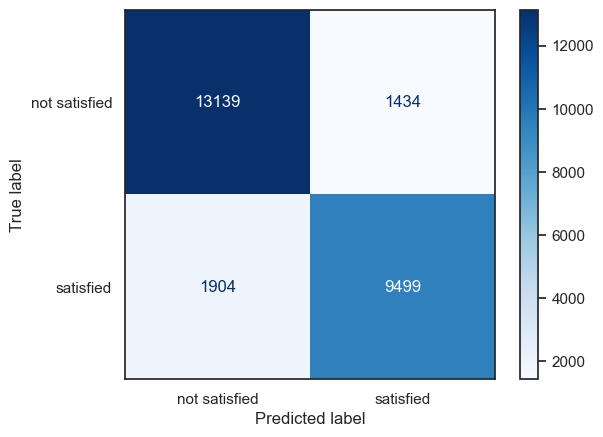

In [58]:
#plot confusion matrix
cm = confusion_matrix(y_test_encoded, model_1_test_pred)
# Define the new labels
new_labels = ['not satisfied', 'satisfied']

# Create a ConfusionMatrixDisplay object and plot the confusion matrix with the new labels
cm_display = ConfusionMatrixDisplay(cm, display_labels=new_labels)
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d')
sns.set_style("white") 
plt.show()

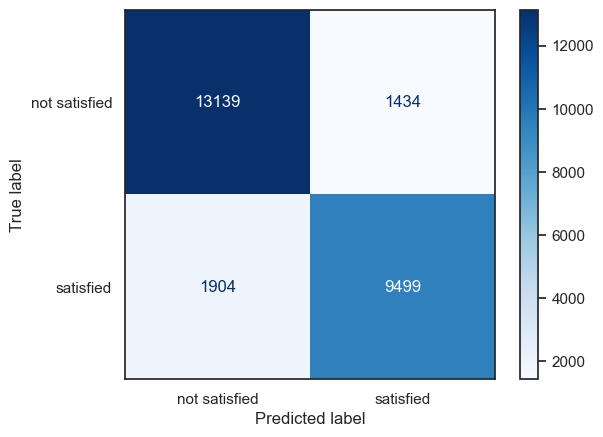

In [57]:
# Define the new labels
new_labels = ['not satisfied', 'satisfied']

# Create a ConfusionMatrixDisplay object and plot the confusion matrix with the new labels
cm_display = ConfusionMatrixDisplay(cm, display_labels=new_labels)
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d')
sns.set_style("white") # or sns.set_style("ticks")
plt.show()

In [35]:
print(classification_report(y_test_encoded, model_1_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [37]:
print(model_1.coef_)

[[-0.1249913  -0.01671032  0.52407255 -0.19045883 -0.19994405  0.03744999
  -0.03673263  0.82628463  0.08825108  0.08550897  0.38845245  0.33280807
   0.15823319  0.40932482  0.14104245  0.29248338  0.15720393 -0.33991342
   0.04066654 -2.03311918 -2.71717956 -0.73710625 -0.85141461]]


In [41]:
# Print the feature names and coefficients
feature_names = X_test_preprocessed.columns
coefficients = model_1.coef_[0]
for feature, coef in zip(feature_names, coefficients):
    print(feature, ': ', coef)

Age :  -0.1249913033400683
Flight Distance :  -0.016710318998313104
Inflight wifi service :  0.5240725545535693
Departure/Arrival time convenient :  -0.19045883241892267
Ease of Online booking :  -0.19994404916794478
Gate location :  0.03744999280271321
Food and drink :  -0.03673263233687425
Online boarding :  0.8262846295749436
Seat comfort :  0.08825108347528889
Inflight entertainment :  0.08550897483772466
On-board service :  0.38845244814009194
Leg room service :  0.3328080712611095
Baggage handling :  0.15823319428151378
Checkin service :  0.409324824227276
Inflight service :  0.14104244951986802
Cleanliness :  0.2924833813654508
Departure Delay in Minutes :  0.15720392828896002
Arrival Delay in Minutes :  -0.33991342076176084
x0_Male :  0.040666537965703825
x1_disloyal Customer :  -2.0331191785602365
x2_Personal Travel :  -2.7171795634345473
x3_Eco :  -0.7371062539218983
x3_Eco Plus :  -0.8514146062791574


### Model 2: Decision Tree

In [27]:
#Instantiate tree
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_preprocessed, y_train_encoded)
model_2_train_pred = model_2.predict(X_train_preprocessed)
print(classification_report(y_train_encoded, model_2_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [28]:
#test set
model_2_test_pred = model_2.predict(X_test_preprocessed)
print(classification_report(y_test_encoded, model_2_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



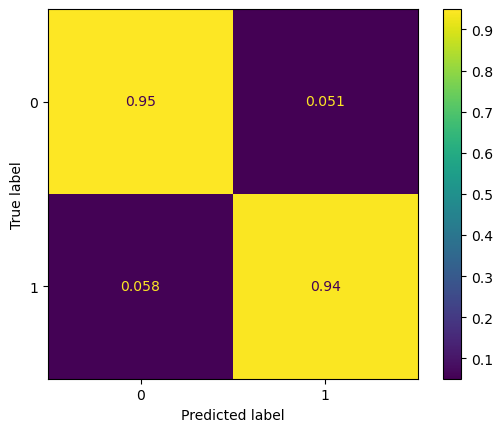

In [29]:
cm = confusion_matrix(y_test_encoded, model_2_test_pred, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=model_2.classes_)
disp.plot()
plt.show()

In [30]:
accuracy = model_2.score(X_test_preprocessed, y_test_encoded)
print('Accuracy:', accuracy)

Accuracy: 0.9462195873113644


### Model 3: Random Forest

In [ ]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train_preprocessed, y_train_encoded)

# Predict the test set
y_pred = rfc.predict(X_test_preprocessed)

# Evaluate the accuracy of the model
accuracy = rfc.score(X_test_preprocessed, y_test_encoded)
print("Accuracy:", accuracy)


### Grid Search

Create an initial grid search

In [ ]:
# Define the parameter grid
param_grid = {'n_estimators': [25, 100], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 50]}

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search #SET OPTIMAL SCORING
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

In [ ]:
rfc = RandomForestClassifier(random_state=42, max_depth=15, min_samples_split=5, n_estimators=100)
rfc.fit(X_train_preprocessed, y_train_encoded)
print(classification_report(y_test_encoded, rfc.predict(X_test_preprocessed)))

Use the best parameters to do another grid search 

In [ ]:
# Define the parameter grid expanding on the previous findings
param_grid = {'n_estimators': [100, 200], 'max_depth': [15, 20, 30], 'min_samples_split': [2, 5, 10]}

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search #SET OPTIMAL SCORING
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

In [ ]:
rfc_best_params = RandomForestClassifier(random_state=42, max_depth=30, min_samples_split=2, n_estimators=200)
rfc_best_params.fit(X_train_preprocessed, y_train_encoded)
print(classification_report(y_test_encoded, rfc_best_params.predict(X_test_preprocessed)))

### Model 4: XGBOOST

In [23]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train_encoded)
print(classification_report(y_test_encoded, xgb_model.predict(X_test_preprocessed), digits=4))

              precision    recall  f1-score   support

           0     0.9585    0.9773    0.9678     14573
           1     0.9702    0.9460    0.9580     11403

    accuracy                         0.9635     25976
   macro avg     0.9644    0.9616    0.9629     25976
weighted avg     0.9637    0.9635    0.9635     25976



Wow, it's already better than the best random forrest. 

### Grid Search

In [24]:
#Define the parameter grid
param_grid = {
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 5, 7],
}

# Create a xgboost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search #SET OPTIMAL SCORING
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

KeyboardInterrupt: 

Create a second grid search based on the results of the first one. 

In [ ]:
#Define the parameter grid based on previous results
param_grid = {
    "learning_rate": [0.05, 0.01, 0.005],
    "n_estimators": [1000],
    "max_depth": [7, 15],
}

# Create a xgboost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search #SET OPTIMAL SCORING
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

### Final Model

In [25]:
#instantiate the classifier
final_model = xgb.XGBClassifier(random_state=42, learning_rate=0.01, n_estimators=1000, max_depth=7)

#fit the model to the training data
final_model.fit(X_train_preprocessed, y_train_encoded)

#test the model and print a classification report
print(classification_report(y_test_encoded, final_model.predict(X_test_preprocessed), digits=4))

              precision    recall  f1-score   support

           0     0.9547    0.9790    0.9667     14573
           1     0.9723    0.9406    0.9562     11403

    accuracy                         0.9622     25976
   macro avg     0.9635    0.9598    0.9614     25976
weighted avg     0.9624    0.9622    0.9621     25976



In [45]:
print('precision score:', precision_score(y_test_encoded, final_model.predict(X_test_preprocessed)))
print('recall score:', recall_score(y_test_encoded, final_model.predict(X_test_preprocessed)))
print('accuracy score:', accuracy_score(y_test_encoded, final_model.predict(X_test_preprocessed)))
print('f1 score:', f1_score(y_test_encoded, final_model.predict(X_test_preprocessed)))

precision score: 0.9722625090645395
recall score: 0.940629658861703
accuracy score: 0.962157376039421
f1 score: 0.9561845330956096


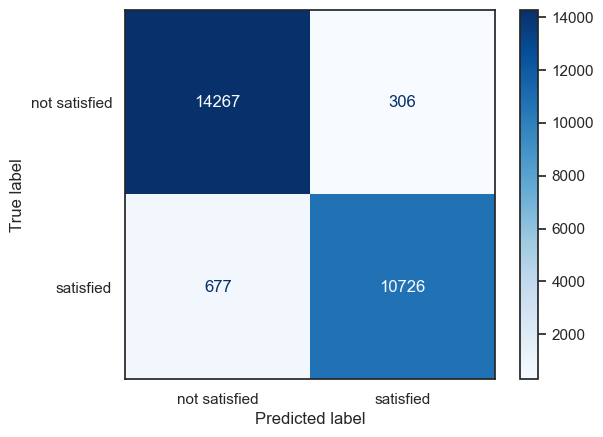

In [61]:
#create a confusion matrix
cm = confusion_matrix(y_test_encoded, final_model.predict(X_test_preprocessed))
new_labels = ['not satisfied', 'satisfied']

# Create a ConfusionMatrixDisplay object and plot the confusion matrix with the new labels
cm_display = ConfusionMatrixDisplay(cm, display_labels=new_labels)
cm_display.plot(cmap='Blues', xticks_rotation='horizontal')
sns.set_style("white") 
plt.show()

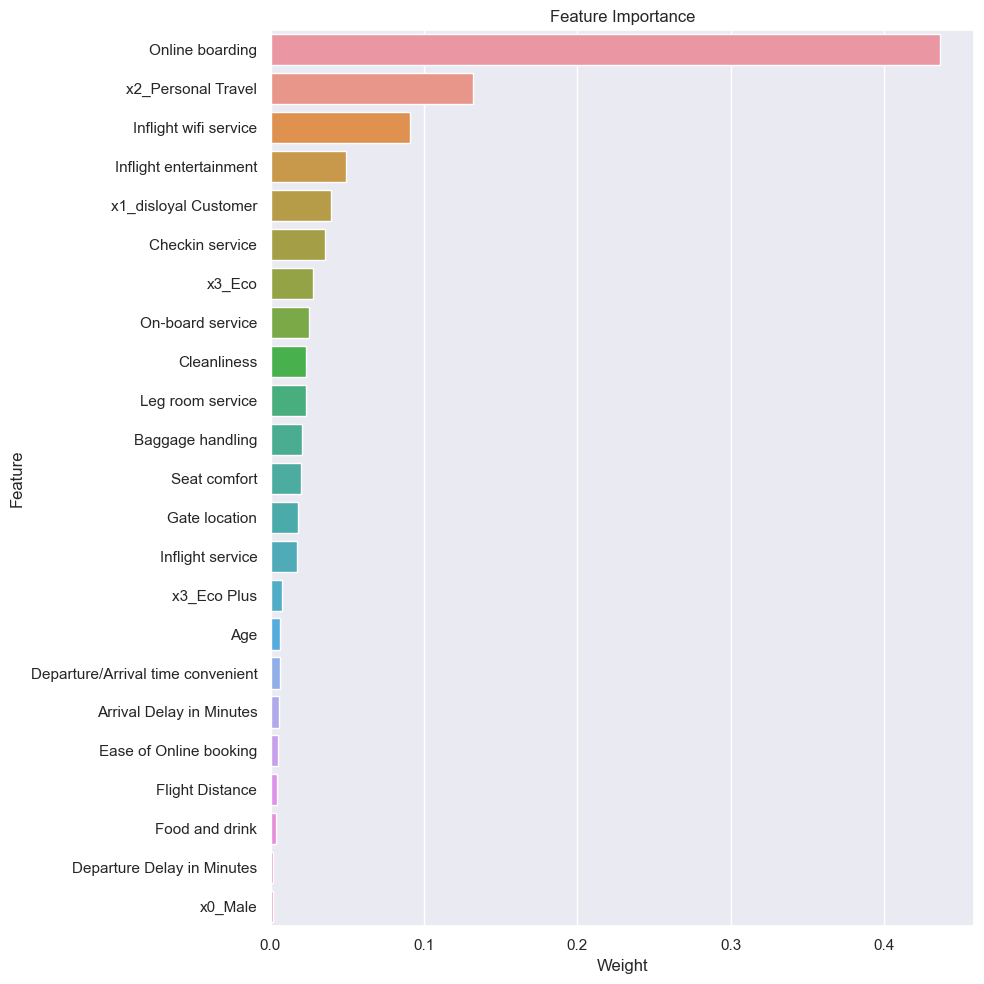

In [32]:
def plot_importance(model, features, num=len(X_train_preprocessed)):
    feature_imp = pd.DataFrame({'Weight': model.feature_importances_, 'Feature': features.columns})
    # print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Weight', y='Feature', data=feature_imp.sort_values(by='Weight', ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show(block=True)

plot_importance(final_model, X_train_preprocessed)


When looking at the top important features, we need to see whether each feature has a positive or negative impact. Let's use the coefficients from the logistic regression model to help determine the relationship between the feature and the satsifaction of a customer. 

Top 5 features and logistic regression coefficients:
* Online boarding: 0.8262846295749436
* Personal travel: -2.7171795634345473
* Inflight wifi: 0.5240725545535693
* Inflight entertainment: 0.08550897483772466
* Disloyal customer: -2.0331191785602365

Based on the logistic regression results, online boarding, inflight WiFi, and inflight entertainment are positively correlated with satisfaction, while personal travel, and disloyal customer are negatively correlated. 

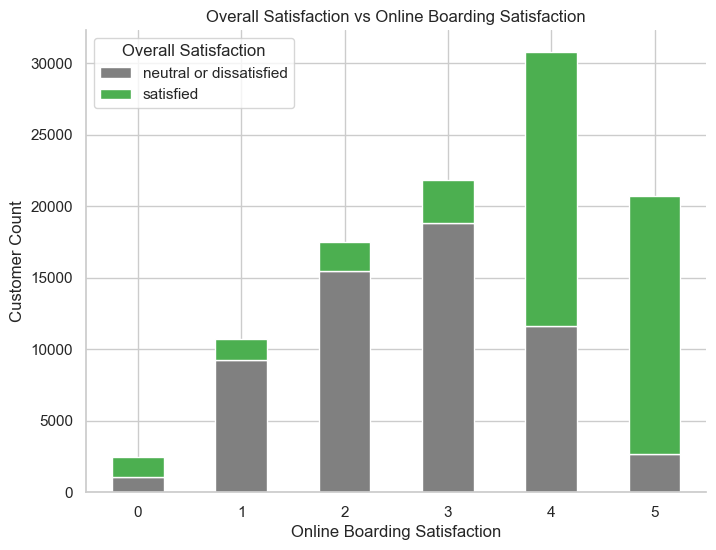

In [87]:
# create a cross-tabulation table
ct = pd.crosstab(train['Online boarding'], train['satisfaction'])

# create a stacked bar chart using seaborn
sns.set(style='whitegrid')
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0,
             color=['#808080', '#4CAF50'])  # specify color palette
ax.set_xlabel('Online Boarding Satisfaction')
ax.set_ylabel('Customer Count')
ax.set_title('Overall Satisfaction vs Online Boarding Satisfaction')
ax.legend(title='Overall Satisfaction', loc='upper left')
sns.despine()

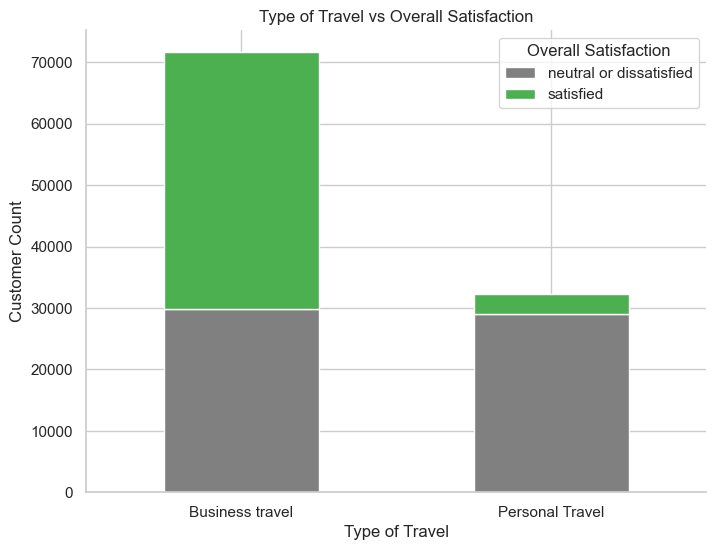

In [86]:
#Customer Satisfaction vs Personal Travel
# create a cross-tabulation table
ct = pd.crosstab(train['Type of Travel'], train['satisfaction'])

# create a stacked bar chart using seaborn
sns.set(style='whitegrid')
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0,
             color=['#808080', '#4CAF50'])  # specify color palette
ax.set_xlabel('Type of Travel')
ax.set_ylabel('Customer Count')
ax.set_title('Type of Travel vs Overall Satisfaction')
ax.legend(title='Overall Satisfaction', loc='upper right')
sns.despine()

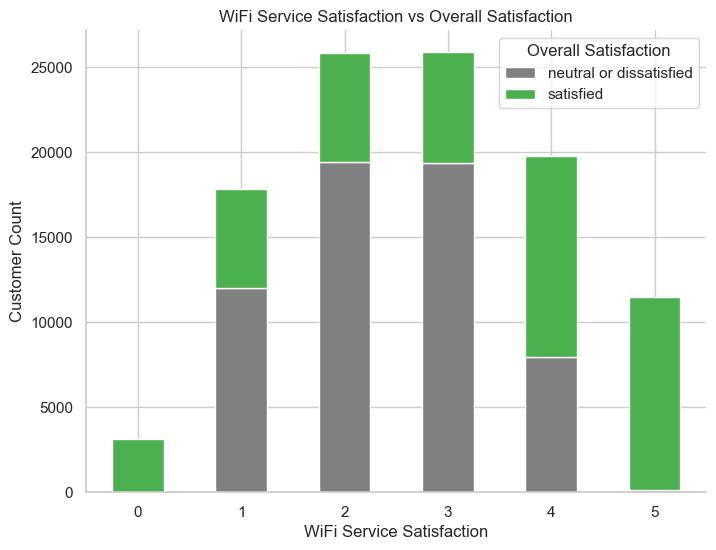

In [88]:
#Customer Satisfaction vs Inflight WiFi
# create a cross-tabulation table
ct = pd.crosstab(train['Inflight wifi service'], train['satisfaction'])

# create a stacked bar chart using seaborn
sns.set(style='whitegrid')
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0,
             color=['#808080', '#4CAF50'])  # specify color palette
ax.set_xlabel('WiFi Service Satisfaction')
ax.set_ylabel('Customer Count')
ax.set_title('WiFi Service Satisfaction vs Overall Satisfaction')
ax.legend(title='Overall Satisfaction', loc='upper right')
sns.despine()

## Results and Conclusions
***
***Results*** 
* The final and best model was an XGBoost classifier. 
* The model had a precision score of 97%
* The model's predictions resulted in false negatives only 2% of the time. 
* The top 5 features that had the most impact on predicting passenger satisfaction were the following (listed in descending order of importance):
    * online boarding
    * personal travel
    * inflight wifi service
    * inflight entertainment service
    * disloyal customer
* The 5 features that had the least impact on predicting passenger satisfaction were the following (listed in descending order of importance):
    * gender
    * departure delay
    * food and drink
    * flight distance
    * ease of online booking 

***Insights and Recommendations***
* Online boarding streamlines the check-in and boarding process. It offers customers a convenient way to check-in, pay for bags, reserve seats, and obtain boarding passes. This is the number one feature that customers valued. Putting resources into online boarding to keep it state of the art may go a long way in terms of improving customer satisfaction. 
* There are two main reasons to travel, personal and business. When customers were traveling for personal reasons, they were more likely to be dissatisfied with the experience. This may stem from who is paying for the travel-- personal payees versus corporate payees. The action item is isolating perosonal travelers and creating new predictions about what features impact their satisfaction. Resources could then be put into those findings.
* The third most important feature in predicting satisfaction was the wifi service. Switching from air to ground (AGT-based) wifi to Satellite-based Wi-Fi is a cost to install and operate; however, it may pay off in the long run as it tends to provide better coverage and higher speeds. Another suggestion is offering free WiFi services instead of charging for the service. Free, fast, and reliable WiFi can make a difference in terms of satisfaction. 
* Inflight entertainment can be a valuable tool for airlines to differentiate themselves and enhance the passenger experience. Offering an extensive library of movies, TV shows, music, games, and other forms of digital media for passengers to enjoy on their personal devices or on seat-back screens is essential. Some airlines set themselves even further apart with virutal reality and augmented reality experiences. Putting more resources into the the inflight entertainment will impact customers' overall experience. 
* Finally, focusing on turning disloyal customers into loyal customers can increase satisfaction. Giving disloyal customers more incentives such as more frequent flier miles as well as enhancing the above reccomendations should help customers become loyal and increase satisfaction. 

***Limitations***
* 

***Next Steps***
* The data should be split between personal and business and new models formed to determine which factors are important to each group. 